# #Hurricane Sandy Metop-A MWS Analysis

In [2]:
from __future__ import print_function, division
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
from netCDF4 import Dataset 
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.io.shapereader as shpreader

[u'Reflectivity', u'lat', u'lon', u'time']
Z shape (518, 780) [[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
Z min, Z max nan nan
lat shape, lon shape (518,) (780,)
Z shape (518, 780) [[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
Z_30 shape (518, 780)
Z_35 shape (518, 780)
Z_40 shape (518, 780)
lats shape, lons shape (518, 780) (518, 780) [[37.0012183  37.0012183  37.0012183  ... 37.0012183  37.0012183
  37.0012183 ]
 [37.00872347 37.00872347 37.00872347 ... 37.00872347 37.00872347
  37.00872347]
 [37.01622864 37.01622864 37.01622864 ... 37.01622864 37.01622864
  37.01622864]
 ...
 [40.86638096 40.86638096 40.86638096 ... 40.86638096 40.86638096
  40.86638096]
 [40.87388613 40.87388613 40.87388613 ..

c:\programdata\anaconda2\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in greater
c:\programdata\anaconda2\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in less
c:\programdata\anaconda2\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in less
c:\programdata\anaconda2\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in less


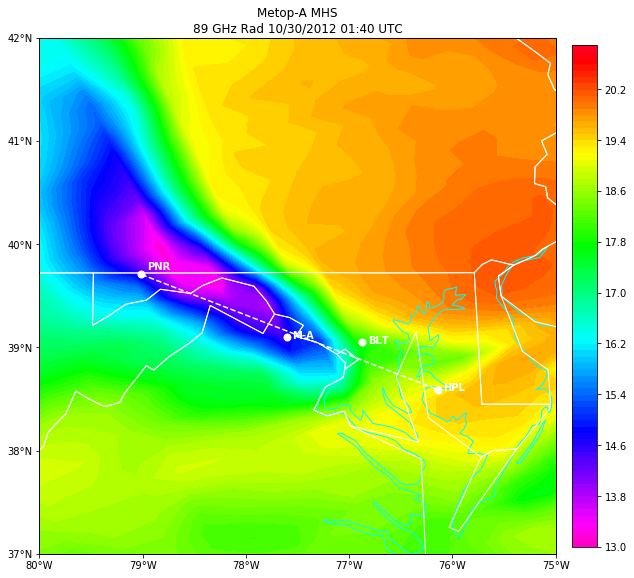

In [3]:
def read_MHS_plot(ncf):
    nc_fid = Dataset(ncf, 'r')
    R = nc_fid.variables["channel_1"][:]  # shape lat, lon as shown above
    lats = nc_fid.variables['lat'][:]  # extract/copy the data
    lons = nc_fid.variables['lon'][:]
    names = nc_fid.variables.keys()
    nc_fid.close()
    return R, lats, lons, names

def read_radar_plot(ncf):
    nc_fid = Dataset(ncf, 'r')
    Z = nc_fid.variables["Reflectivity"][:]  # shape lat, lon as shown above
    lat = nc_fid.variables['lat'][:]  # extract/copy the data
    lon = nc_fid.variables['lon'][:]
    names = nc_fid.variables.keys()
    nc_fid.close()
    return Z, lat, lon, names

Z_file = 'KLWX_V06_20121030_013947.nc'
Z, lat, lon, names = read_radar_plot(Z_file)
Z = Z[0,:,:]
print(names)
print('Z shape', Z.shape, Z)
Z_max = np.amax(Z)
Z_min = np.amin(Z)
print('Z min, Z max', Z_min, Z_max)
print('lat shape, lon shape', lat.shape, lon.shape)

Z[Z>60]=59
print('Z shape', Z.shape, Z)

Z_30 = ma.masked_where(Z < 30, Z)
print('Z_30 shape', Z_30.shape)

Z_35 = ma.masked_where(Z < 35, Z)
print('Z_35 shape', Z_35.shape)

Z_40 = ma.masked_where(Z < 40, Z)
print('Z_40 shape', Z_40.shape)

lonz,latz = np.meshgrid(lon,lat)
print('lats shape, lons shape', latz.shape, lonz.shape, latz,lonz)

MHS_file = 'W_XX-EUMETSAT-Darmstadt,SOUNDING+SATELLITE,METOPA+MHS_C_EUMP_20121030013459_31288_eps_o_l1.nc'
R, lats, lons, names = read_MHS_plot(MHS_file)
R_kw = R * 1000
R_kwmn = np.mean(R_kw)
lats_mn = np.mean(lats)
lons_mn = np.mean(lons)
print("R mean = ", R_kwmn)
print("Lats mean= ", lats_mn)
print("Lons mean= ", lons_mn)
R_max = np.amax(R_kw)
R_min = np.amin(R_kw)
print("R max =", R_max)
print("R min =", R_min)
print("R = ", R_kw, R_kw.shape)
print("Lats = ", lats, lats.shape)
print("Lons = ", lons, lons.shape)

fig = plt.figure(figsize=(10, 10))
img_extent = (-80, -75, 37, 41)
ax = plt.axes(projection=ccrs.PlateCarree(globe=None))
ax.set_extent([-80, -75, 37, 41], ccrs.PlateCarree(globe=None))

shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m',
                                         category='cultural', name=shapename)
plt.title('Metop-A MHS\n'
          '89 GHz Rad 10/30/2012 01:40 UTC')
levels = np.arange(13,21,0.1)
mi = ax.contourf(lons, lats, R_kw, levels, extent=img_extent, transform=ccrs.PlateCarree(globe=None), cmap='gist_rainbow_r')
ax.coastlines(resolution='50m', color='cyan', linewidth=1)
for state in shpreader.Reader(states_shp).geometries():
    # pick a default color for the land with a black outline,
    facecolor = ''
    edgecolor = 'white'
    ax.add_geometries([state], ccrs.PlateCarree(),
                          facecolor=facecolor, edgecolor=edgecolor)
    
ax.set_xticks([-80,-79,-78,-77,-76,-75])
ax.set_yticks([37,38,39,40,41,42])   

ax.plot(-79.0121, 39.7057, 'wo', markersize=7, transform=ccrs.Geodetic())
ax.text(-78.96, 39.75, 'PNR', color='white', weight='bold', transform=ccrs.Geodetic())
ax.plot(-76.8785, 39.0554, 'wo', markersize=7, transform=ccrs.Geodetic())
ax.text(-76.82, 39.04, 'BLT', color='white', weight='bold', transform=ccrs.Geodetic())
ax.plot(-76.14, 38.59, 'wo', markersize=7, transform=ccrs.Geodetic())
ax.text(-76.09, 38.58, 'HPL', color='white', weight='bold', transform=ccrs.Geodetic())
ax.plot(-77.6, 39.1, 'wo', markersize=7, transform=ccrs.Geodetic())
ax.text(-77.55, 39.09, 'M-A', color='white', weight='bold', transform=ccrs.Geodetic())  

ax.plot([-79.0121,-76.14],[39.7057,38.59],color='white',linestyle='--',transform=ccrs.PlateCarree(),) 

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(mi,fraction=0.045,pad=0.03)
plt.savefig("mhs_89R_0140.png",dpi=250,bbox_inches='tight')
plt.show()

sigma =  0.296872044726
BT mean =  247.98515092258725
BT max = 278.9846462995905
BT min = 179.33422840184733
BT =  [[258.6608360225595 258.5552755889382 258.4483442445412 ...
  252.15447490359867 251.44297017821572 252.39849771888473]
 [256.9471926580609 257.2638739509292 258.3880239962068 ...
  255.9039265810569 252.53284735715818 253.31563964554155]
 [256.2343170196846 254.9552536151836 257.111702420073 ...
  258.58269388527214 255.95053768056664 255.46386296460224]
 ...
 [248.39816865305656 249.16725179328384 251.17701272869192 ...
  242.3908204818252 237.12102441363265 231.75663523097947]
 [247.3494189130137 248.46671438817305 250.06657182921742 ...
  239.91083580658884 234.5464466236782 231.66889668990873]
 [245.44110566729825 247.49747770142986 247.6249727668833 ...
  235.3251261690336 230.69280543048274 230.130730409421]] (223, 90)


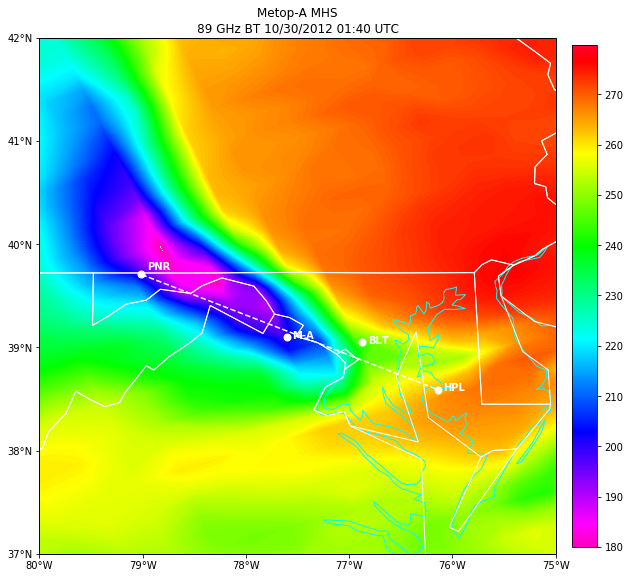

In [4]:
C1 = .00001191
C2 = 1.439
f = 8900000000
c = 29979245800
sigma = f/c
print("sigma = ", sigma)
BT = (C2*sigma)/(np.log(1+((C1*(sigma**3))/R)))
BT = BT/100
BTmn = np.mean(BT)
print("BT mean = ", BTmn)
BT_max = np.amax(BT)
BT_min = np.amin(BT)
print("BT max =", BT_max)
print("BT min =", BT_min)
print("BT = ", BT, BT.shape)

fig = plt.figure(figsize=(10, 10))
img_extent = (-80, -75, 37, 41)
ax = plt.axes(projection=ccrs.PlateCarree(globe=None))
ax.set_extent([-80, -75, 37, 41], ccrs.PlateCarree(globe=None))

shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m',
                                         category='cultural', name=shapename)
plt.title('Metop-A MHS\n'
          '89 GHz BT 10/30/2012 01:40 UTC')
Tlevels = np.arange(180,280,0.1)
mi = ax.contourf(lons, lats, BT, Tlevels, extent=img_extent, transform=ccrs.PlateCarree(globe=None), cmap='gist_rainbow_r')
ax.coastlines(resolution='50m', color='cyan', linewidth=1)
for state in shpreader.Reader(states_shp).geometries():
    # pick a default color for the land with a black outline,
    facecolor = ''
    edgecolor = 'white'
    ax.add_geometries([state], ccrs.PlateCarree(),
                          facecolor=facecolor, edgecolor=edgecolor)
ax.set_xticks([-80,-79,-78,-77,-76,-75])
ax.set_yticks([37,38,39,40,41,42])   

ax.plot(-79.0121, 39.7057, 'wo', markersize=7, transform=ccrs.Geodetic())
ax.text(-78.96, 39.75, 'PNR', color='white', weight='bold', transform=ccrs.Geodetic())
ax.plot(-76.8785, 39.0554, 'wo', markersize=7, transform=ccrs.Geodetic())
ax.text(-76.82, 39.04, 'BLT', color='white', weight='bold', transform=ccrs.Geodetic())
ax.plot(-76.14, 38.59, 'wo', markersize=7, transform=ccrs.Geodetic())
ax.text(-76.09, 38.58, 'HPL', color='white', weight='bold', transform=ccrs.Geodetic())
ax.plot(-77.6, 39.1, 'wo', markersize=7, transform=ccrs.Geodetic())
ax.text(-77.55, 39.09, 'M-A', color='white', weight='bold', transform=ccrs.Geodetic())    

ax.plot([-79.0121,-76.14],[39.7057,38.59],color='white',linestyle='--',transform=ccrs.PlateCarree(),) 
    
lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(mi,fraction=0.045,pad=0.03)
plt.savefig("mhs_89T_0140.png",dpi=250,bbox_inches='tight')
plt.show()

c:\programdata\anaconda2\lib\site-packages\matplotlib\contour.py:1004: UserWarning: The following kwargs were not used by contour: 'latlon'
  s)


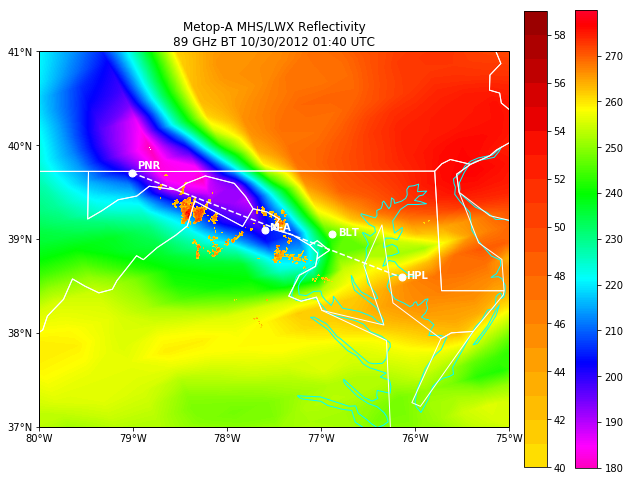

In [5]:
fig = plt.figure(figsize=(10, 10))
img_extent = (-80, -75, 37.5, 40.5)
ax = plt.axes(projection=ccrs.PlateCarree(globe=None))
ax.set_extent([-80, -75, 37.5, 40.5], ccrs.PlateCarree(globe=None))
shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m',
                                         category='cultural', name=shapename)
plt.title('Metop-A MHS/LWX Reflectivity\n'
          '89 GHz BT 10/30/2012 01:40 UTC')

Tlevels = np.arange(180,280,0.1)
mi = ax.contourf(lons, lats, BT, Tlevels, extent=img_extent, transform=ccrs.PlateCarree(globe=None), cmap='gist_rainbow_r')
Zlevels = np.arange(40,60,1)
cZ = ax.contourf(lonz,latz,Z_40,Zlevels,latlon=True,cmap=plt.cm.jet,vmin=0,vmax=60)
ax.coastlines(resolution='50m', color='cyan', linewidth=1)
for state in shpreader.Reader(states_shp).geometries():
    # pick a default color for the land with a black outline,
    facecolor = ''
    edgecolor = 'white'
    ax.add_geometries([state], ccrs.PlateCarree(),
                          facecolor=facecolor, edgecolor=edgecolor)
ax.set_xticks([-80,-79,-78,-77,-76,-75])
ax.set_yticks([37,38,39,40,41])

ax.plot(-79.0121, 39.7057, 'wo', markersize=7, transform=ccrs.Geodetic())
ax.text(-78.96, 39.75, 'PNR', color='white', weight='bold', transform=ccrs.Geodetic())
ax.plot(-76.8785, 39.0554, 'wo', markersize=7, transform=ccrs.Geodetic())
ax.text(-76.82, 39.04, 'BLT', color='white', weight='bold', transform=ccrs.Geodetic())
ax.plot(-76.14, 38.59, 'wo', markersize=7, transform=ccrs.Geodetic())
ax.text(-76.09, 38.58, 'HPL', color='white', weight='bold', transform=ccrs.Geodetic())
ax.plot(-77.6, 39.1, 'wo', markersize=7, transform=ccrs.Geodetic())
ax.text(-77.55, 39.09, 'M-A', color='white', weight='bold', transform=ccrs.Geodetic())  

ax.plot([-79.0121,-76.14],[39.7057,38.59],color='white',linestyle='--',transform=ccrs.PlateCarree(),)   

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar1=plt.colorbar(mi,fraction=0.041,pad=0.05)
cbar2=plt.colorbar(cZ,fraction=0.045,pad=0.03)
plt.savefig("mhs_89T_Z40_0140_MD.png",dpi=250,bbox_inches='tight')
plt.show()

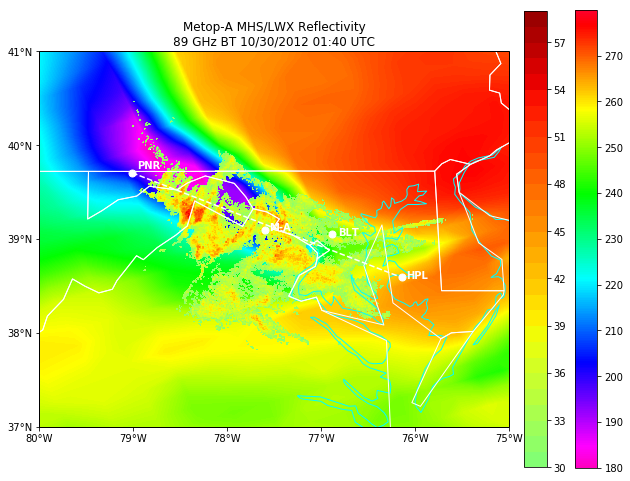

In [6]:
fig = plt.figure(figsize=(10, 10))
img_extent = (-80, -75, 37.5, 40.5)
ax = plt.axes(projection=ccrs.PlateCarree(globe=None))
ax.set_extent([-80, -75, 37.5, 40.5], ccrs.PlateCarree(globe=None))
shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m',
                                         category='cultural', name=shapename)
plt.title('Metop-A MHS/LWX Reflectivity\n'
          '89 GHz BT 10/30/2012 01:40 UTC')

Tlevels = np.arange(180,280,0.1)
mi = ax.contourf(lons, lats, BT, Tlevels, extent=img_extent, transform=ccrs.PlateCarree(globe=None), cmap='gist_rainbow_r')
Zlevels = np.arange(30,60,1)
cZ = ax.contourf(lonz,latz,Z_30,Zlevels,latlon=True,cmap=plt.cm.jet,vmin=0,vmax=60)
ax.coastlines(resolution='50m', color='cyan', linewidth=1)
for state in shpreader.Reader(states_shp).geometries():
    # pick a default color for the land with a black outline,
    facecolor = ''
    edgecolor = 'white'
    ax.add_geometries([state], ccrs.PlateCarree(),
                          facecolor=facecolor, edgecolor=edgecolor)
ax.set_xticks([-80,-79,-78,-77,-76,-75])
ax.set_yticks([37,38,39,40,41])

ax.plot(-79.0121, 39.7057, 'wo', markersize=7, transform=ccrs.Geodetic())
ax.text(-78.96, 39.75, 'PNR', color='white', weight='bold', transform=ccrs.Geodetic())
ax.plot(-76.8785, 39.0554, 'wo', markersize=7, transform=ccrs.Geodetic())
ax.text(-76.82, 39.04, 'BLT', color='white', weight='bold', transform=ccrs.Geodetic())
ax.plot(-76.14, 38.59, 'wo', markersize=7, transform=ccrs.Geodetic())
ax.text(-76.09, 38.58, 'HPL', color='white', weight='bold', transform=ccrs.Geodetic())
ax.plot(-77.6, 39.1, 'wo', markersize=7, transform=ccrs.Geodetic())
ax.text(-77.55, 39.09, 'M-A', color='white', weight='bold', transform=ccrs.Geodetic())  

ax.plot([-79.0121,-76.14],[39.7057,38.59],color='white',linestyle='--',transform=ccrs.PlateCarree(),)   

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar1=plt.colorbar(mi,fraction=0.041,pad=0.05)
cbar2=plt.colorbar(cZ,fraction=0.045,pad=0.03)
plt.savefig("mhs_89T_Z30_0140_MD.png",dpi=250,bbox_inches='tight')
plt.show()

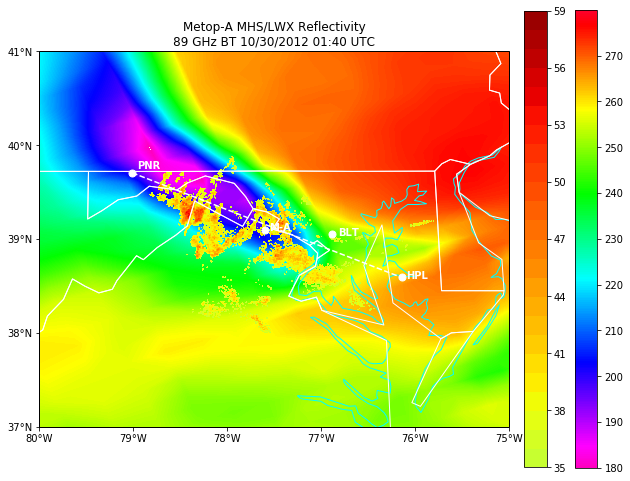

In [7]:
fig = plt.figure(figsize=(10, 10))
img_extent = (-80, -75, 37.5, 40.5)
ax = plt.axes(projection=ccrs.PlateCarree(globe=None))
ax.set_extent([-80, -75, 37.5, 40.5], ccrs.PlateCarree(globe=None))
shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m',
                                         category='cultural', name=shapename)
plt.title('Metop-A MHS/LWX Reflectivity\n'
          '89 GHz BT 10/30/2012 01:40 UTC')

Tlevels = np.arange(180,280,0.1)
mi = ax.contourf(lons, lats, BT, Tlevels, extent=img_extent, transform=ccrs.PlateCarree(globe=None), cmap='gist_rainbow_r')
Zlevels = np.arange(35,60,1)
cZ = ax.contourf(lonz,latz,Z_35,Zlevels,latlon=True,cmap=plt.cm.jet,vmin=0,vmax=60)
ax.coastlines(resolution='50m', color='cyan', linewidth=1)
for state in shpreader.Reader(states_shp).geometries():
    # pick a default color for the land with a black outline,
    facecolor = ''
    edgecolor = 'white'
    ax.add_geometries([state], ccrs.PlateCarree(),
                          facecolor=facecolor, edgecolor=edgecolor)
ax.set_xticks([-80,-79,-78,-77,-76,-75])
ax.set_yticks([37,38,39,40,41])

ax.plot(-79.0121, 39.7057, 'wo', markersize=7, transform=ccrs.Geodetic())
ax.text(-78.96, 39.75, 'PNR', color='white', weight='bold', transform=ccrs.Geodetic())
ax.plot(-76.8785, 39.0554, 'wo', markersize=7, transform=ccrs.Geodetic())
ax.text(-76.82, 39.04, 'BLT', color='white', weight='bold', transform=ccrs.Geodetic())
ax.plot(-76.14, 38.59, 'wo', markersize=7, transform=ccrs.Geodetic())
ax.text(-76.09, 38.58, 'HPL', color='white', weight='bold', transform=ccrs.Geodetic())
ax.plot(-77.6, 39.1, 'wo', markersize=7, transform=ccrs.Geodetic())
ax.text(-77.55, 39.09, 'M-A', color='white', weight='bold', transform=ccrs.Geodetic())  

ax.plot([-79.0121,-76.14],[39.7057,38.59],color='white',linestyle='--',transform=ccrs.PlateCarree(),)   

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar1=plt.colorbar(mi,fraction=0.041,pad=0.05)
cbar2=plt.colorbar(cZ,fraction=0.045,pad=0.03)
plt.savefig("mhs_89T_Z35_0140_MD.png",dpi=250,bbox_inches='tight')
plt.show()